In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Read dataset

In [2]:
df = pd.read_csv("data/winequality-red.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Description dataset

In [3]:
# General
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Distribution objetive column
df.iloc[:, -1].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Data division

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Models

#### Random Forest Classifier

Model without preprocess data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### RandomForestClassifier

In [7]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = model.predict(X_test)


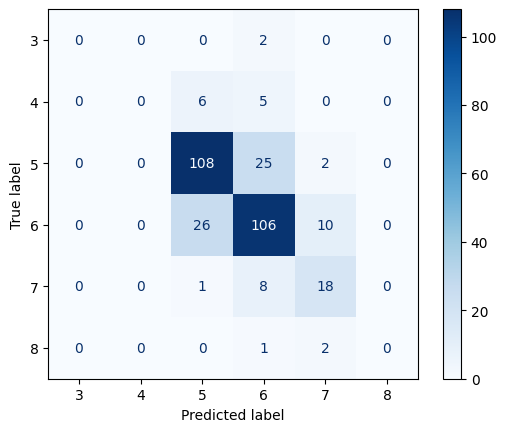

In [9]:
# Metrics
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='Blues')

##### SVC

In [10]:
model = SVC(gamma='auto', random_state=0)
model.fit(X_train, y_train)

SVC(gamma='auto', random_state=0)

In [11]:
y_pred = model.predict(X_test)

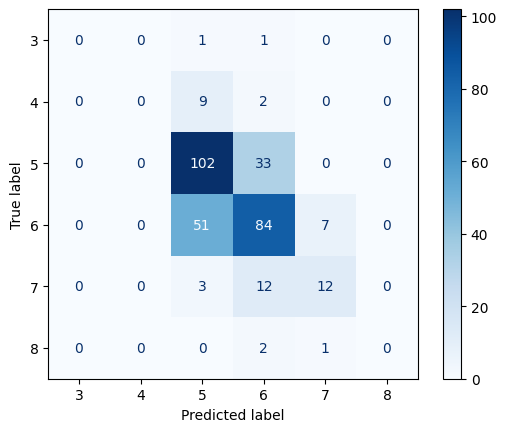

In [12]:
# Metrics
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='Blues')

#### Model with scale 

In [13]:
# Scale 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### RandomForestClassifier

In [15]:
# Fit
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = model.predict(X_test)

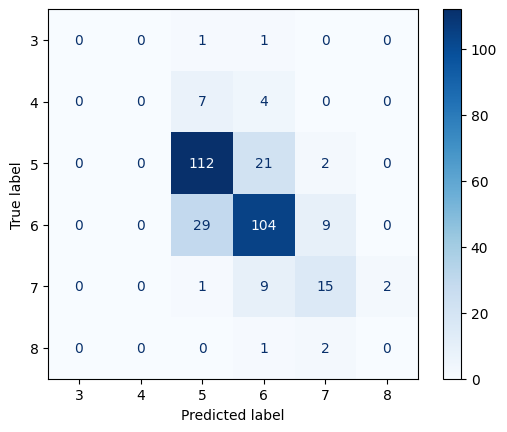

In [17]:
# Metrics
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='Blues')

##### SVC

In [18]:
model = SVC(gamma='auto', random_state=0)
model.fit(X_train, y_train)

SVC(gamma='auto', random_state=0)

In [19]:
y_pred = model.predict(X_test)

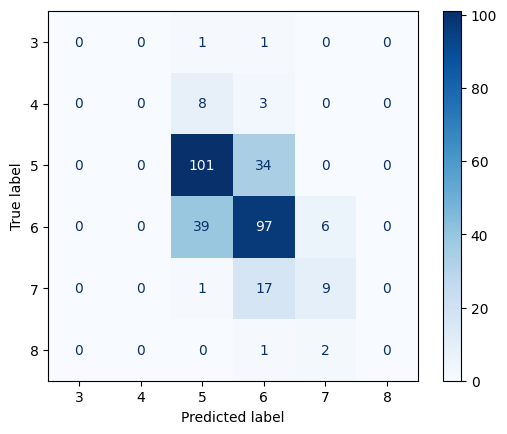

In [20]:
# Metrics
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='Blues')

#### Model with data imbalance control without scale

In [21]:
X = df.iloc[:, :-1].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
smote = SMOTE(random_state=0)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

In [24]:
# Fit
model = RandomForestClassifier()
model.fit(X_train_s, y_train_s)

RandomForestClassifier()

In [25]:
y_pred = model.predict(X_test)

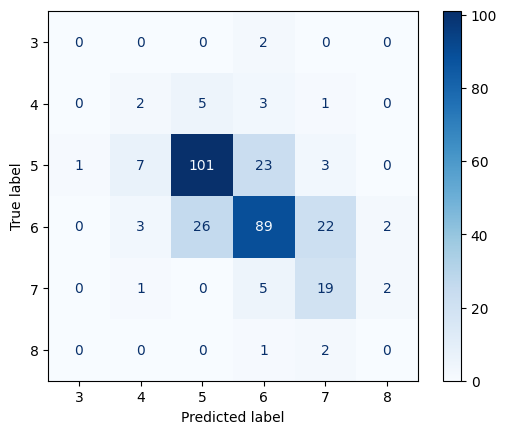

In [26]:
# Metrics
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='Blues')

#### Model with data imbalance control with scale

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
smote = SMOTE(random_state=0)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

In [30]:
# Fit
model = RandomForestClassifier()
model.fit(X_train_s, y_train_s)

RandomForestClassifier()

In [31]:
y_pred = model.predict(X_test)

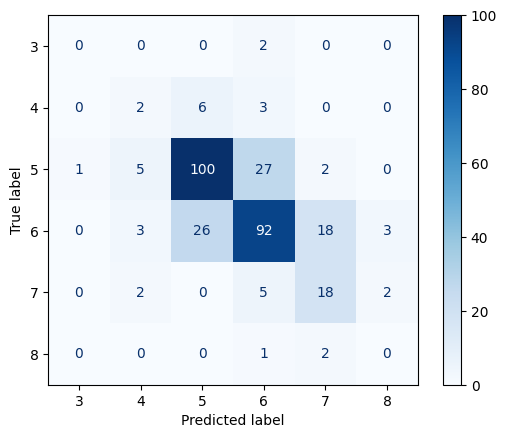

In [32]:
# Metrics
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='Blues')

#### Model with another data imbalance control without scale

In [33]:
X = df.iloc[:, :-1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
rus = RandomUnderSampler(random_state=0)
X_train_r, y_train_r = rus.fit_resample(X_train, y_train)

In [36]:
# Fit
model = RandomForestClassifier()
model.fit(X_train_r, y_train_r)

RandomForestClassifier()

In [37]:
y_pred = model.predict(X_test)

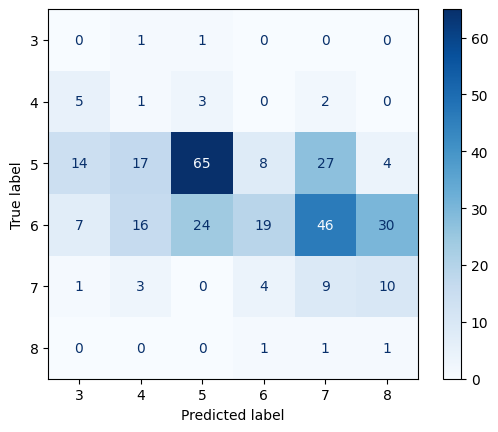

In [38]:
# Metrics
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='Blues')